In [43]:
import os
import sys
import logging
import lmfit as lm
# import glob
# import time
# import datetime as dt
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.special  import erf
# from scipy.optimize import curve_fit

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Custom packages
import iXAtom_Class_RunParameters as iXC_RunPars
import iXAtom_Class_Detector      as iXC_Detect
import iXAtom_Class_Monitor       as iXC_Monitor
import iXAtom_Class_Raman         as iXC_Raman
import iXAtom_Class_Ramsey        as iXC_Ramsey
import iXAtom_Class_Rabi          as iXC_Rabi
import iXAtom_Class_Physics       as iXC_Physics
import iXAtom_Utilities           as iXUtils

# For inline plots
%matplotlib inline
# Reload IPython extension 'autoreload'
%reload_ext autoreload
# autoreload: Reload all modules (except those excluded by %aimport) automatically now
# autoreload 0: Disable automatic reloading of modules
# autoreload 1: Reload all modules imported with %aimport every time before executing
# autoreload 2: Reload all modules (except those excluded by %aimport) every time before executing
%autoreload 1

%aimport iXAtom_Class_RunParameters
%aimport iXAtom_Class_Detector
%aimport iXAtom_Class_Monitor
%aimport iXAtom_Class_Raman
%aimport iXAtom_Class_Ramsey
%aimport iXAtom_Class_Rabi
%aimport iXAtom_Class_Physics
%aimport iXAtom_Utilities

logging.disable(level=logging.NOTSET)

# mpl.rcdefaults()

iXUtils.SetDefaultPlotOptions()

In [33]:
WorkDir = 'C:\\Bryns Goodies\\Work-iXAtom\\Data 2020\\February\\05'
Folder  = 'Monitor'
Runs    = [1]

MonitorOpts = {
    'ConvertToTemperature':	False 			## Flag for converting certain monitor voltages to temperature
}

PlotOpts = {
    'PlotData': 			True,			## Flag for plotting data
    'ShowPlot': 			True,			## Flag for showing data plots (PlotData = True and SavePlot = False)
    'ShowFit': 				True,			## Flag for overlaying fits with data (PlotData = True)
    'SavePlot': 			False,			## Flag for saving data plots (PlotData = True)
    'OverlayRunPlots':		True,			## Flag for overlaying plots from different runs (PlotData = True)
    'MaxPlotsToDisplay':	14,				## Maximum number of individual plots to display (AnalysisLevel = 2, OverlayRunPlots = True)
    'ShowPlotLabels':		[True, True], 	## Plot labels [xLabel, yLabel]
    'ShowPlotTitle': 		True,			## Flag for showing plot title (OverlayRunPlots = False)
    'ShowPlotLegend':		False,			## Flag for showing plot legend
    'FixLegLocation':		True, 			## Flag for fixing location of legend (ShowPlotLegend = True)
    'PlotFolderPath':		os.path.join(WorkDir, 'PostProcessed', Folder), ## Path for saving figures
    'PlotExtension':		'png',			## Plot file extension (png, pdf)
}

Mon   = iXC_Monitor.Monitor(WorkDir, Folder, Runs, MonitorOpts, PlotOpts)
MonDF = Mon.MonitorDF

MonDF.head()

,#Iteration,Date,Time,TiltX,TiltY,MOTPowerX,MOTPowerY,MOTPowerZ,MOTMonitor,RamanBX,RamanBY,RamanBZ,MOTFluores,TempChamber,NTotalRaw,NTotalBG
0,1,05/02/2020,10:38:53.293,2.51508,2.51172,-0.001694,0.000074,-0.001123,0.009538,-4.88367,1.85551,-1.18549,-0.003857,0.989849,0.130140,0.132694
1,2,05/02/2020,10:38:55.363,2.51523,2.51177,-0.001634,0.000025,-0.001231,0.009542,-4.88323,1.85623,-1.18542,-0.003809,0.990630,0.129566,0.131870
2,3,05/02/2020,10:38:57.486,2.51497,2.51173,-0.001707,0.000061,-0.001119,0.009590,-4.88390,1.85631,-1.18558,-0.004163,0.990091,0.129478,0.131589
3,4,05/02/2020,10:38:59.558,2.51514,2.51164,-0.001686,0.000094,-0.001135,0.009582,-4.88085,1.85786,-1.18653,-0.004051,0.990139,0.129681,0.132540
4,5,05/02/2020,10:39:01.701,2.51502,2.51176,-0.001743,0.000074,-0.001151,0.009550,-4.88353,1.85796,-1.18602,-0.003922,0.990481,0.129397,0.132183



----------- MOTPowerX Fit Results -----------
[[Model]]
    (Model(step, form='erf') + Model(constant))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 36
    # data points      = 101
    # variables        = 4
    chi-square         = 0.00193948
    reduced chi-square = 1.9995e-05
    Akaike info crit   = -1088.90607
    Bayesian info crit = -1078.44559
[[Variables]]
    c:         -0.00415980 +/- 7.1860e-04 (17.27%) (init = 0)
    amplitude:  0.85728174 +/- 0.00173464 (0.20%) (init = 0.8478868)
    center:     0.65479741 +/- 5.4445e-04 (0.08%) (init = 0.5)
    sigma:      0.18482163 +/- 0.00101618 (0.55%) (init = 0.1428571)

----------- MOTPowerY Fit Results -----------
[[Model]]
    (Model(step, form='erf') + Model(constant))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 36
    # data points      = 101
    # variables        = 4
    chi-square         = 0.00249119
    reduced chi-square = 2.5682e-05
    Akaike info crit   

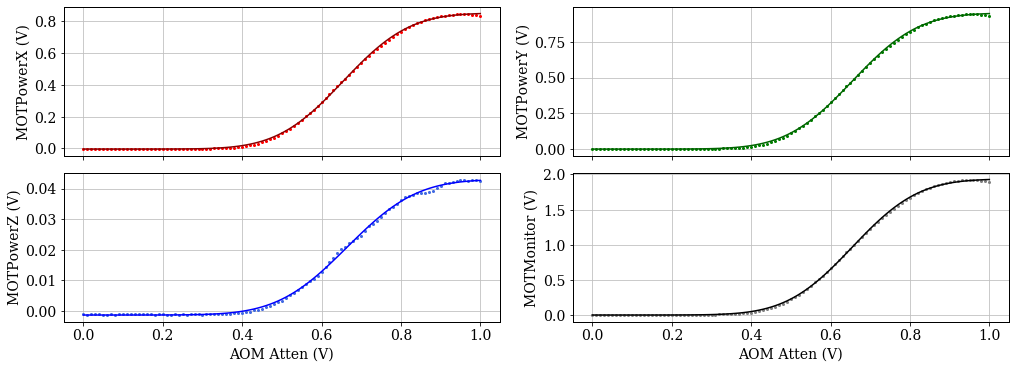

In [50]:
mpl.rc('font', size=14, family='serif')
mpl.rc('axes', titlesize=14, labelsize=14, edgecolor='black', linewidth=1)
mpl.rc('legend', fontsize=14)
mpl.rc('lines', linewidth=1.5, markersize=4)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14,5), sharex='col', constrained_layout=True)

PlotOpts = {'Color': 'red', 'Linestyle': 'None', 'Marker': '.',
    'Title': 'None', 'xLabel': 'AOM Atten (V)', 'yLabel': 'None',
    'LegLabel': 'None', 'Legend': False, 'LegLocation': 'best'}

xData     = np.linspace(0., 1., num=101, endpoint=True)
MonCols   = ['MOTPowerX', 'MOTPowerY', 'MOTPowerZ', 'MOTMonitor']
Colors    = ['red', 'green', 'royalblue', 'grey']
FitColors = ['darkred', 'darkgreen', 'blue', 'black']

# def fFit(x, A, x0, sig):
#     return 0.5*A*(1. + np.tanh((x - x0)/sig))
# A, x0, sig = (0.85, 0.67, 0.15)
# yFit = fFit(xData, A, x0, sig)

# def fFit(x, A, x0, sig):
#     return A*(0.5 + np.arctan((x - x0)/sig)/np.pi)
# A, x0, sig = (0.85, 0.67, 0.1)
# yFit = fFit(xData, A, x0, sig)

# def fFit(x, A, x0, sig):
#     return 0.5*A*(1 + erf((x - x0)/sig))
# A, x0, sig = (0.85, 0.67, 0.19)
# yFit = fFit(xData, A, x0, sig)

# def fFit(x, A, x0, sig):
#     return A*(1 - 1/(1 + np.exp((x - x0)/sig)))
# A, x0, sig = (0.85, 0.67, 0.08)
# yFit = fFit(xData, A, x0, sig)

Step     = lm.models.StepModel(form='erf')
Constant = lm.models.ConstantModel()
Model    = Step + Constant

i = -1
for col in MonCols:
    i += 1
    r = i // 2
    c = i % 2
    yData = MonDF[col].to_numpy()
    
    PlotOpts['Linestyle'] = 'None'
    PlotOpts['Marker']    = '.'
    PlotOpts['xLabel']    = 'None' if r == 0 else 'AOM Atten (V)'
    PlotOpts['yLabel']    = col + ' (V)'
    PlotOpts['Color']     = Colors[i]
    iXUtils.CustomPlot(axs[r,c], PlotOpts, xData, yData)

    PlotOpts['Linestyle'] = '-'
    PlotOpts['Marker']    = 'None'
    PlotOpts['Color']     = FitColors[i]
    Params = Constant.make_params(c=0.) + Step.guess(yData, x=xData)
    Result = Model.fit(yData, Params, x=xData)
    iXUtils.CustomPlot(axs[r,c], PlotOpts, xData, Result.best_fit)

    print('\n----------- {} Fit Results -----------'.format(col))
    print(Result.fit_report(show_correl=False))
    
plt.show()